In [1]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import time

In [2]:
cap=cv2.VideoCapture(0)

In [3]:
CATEGORIES = ["Rock", "Paper", "Scissors"]
ROOT_DIR = "C:/Users/Satyamedh/PycharmProjects/WebcamRockPaperScissors"

In [4]:
if not cap.isOpened():
    print("Cannot open camera")
    exit()

In [5]:
if not os.path.exists(os.path.join(ROOT_DIR, 'data')):
    os.makedirs(os.path.join(ROOT_DIR, 'data'))
    for category in CATEGORIES:
        os.makedirs(os.path.join(ROOT_DIR, f'data/{category}'))

In [6]:
def process_frame(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # frame = cv2.absdiff(frame, 255)
    # crop the frame to a square
    frame = frame[200:400, 200:400]
    return frame


3
2
1


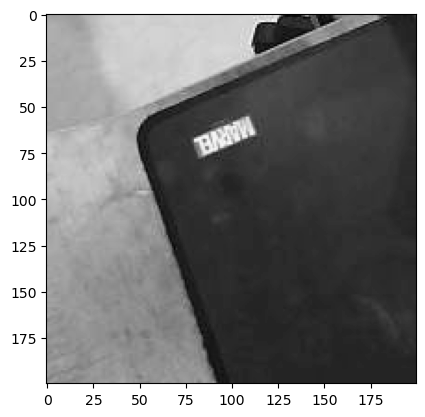

In [7]:
for i in range(3):
    print(3-i)
    time.sleep(1)

# capture and show frame
success, frame = cap.read()
frame = process_frame(frame)
plt.imshow(frame, cmap='gray')
plt.show()

C:\Users\Satyamedh\AppData\Local\Temp\ipykernel_22856\533284525.py:3: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(framee, cmap='gray')
C:\Users\Satyamedh\AppData\Local\Temp\ipykernel_22856\533284525.py:3: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(framee, cmap='gray')


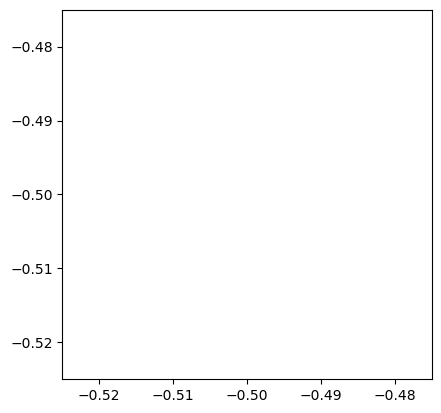

In [8]:
# get only middle part of the frame
framee = frame[200:400, 200:400]
plt.imshow(framee, cmap='gray')
plt.show()

In [16]:
NUM_SAMPLES_PER_CATEGORY = 100
curr_num_samples = {category: len(os.listdir(os.path.join(ROOT_DIR, f'data/{category}'))) for category in CATEGORIES}
curr_num_samples

{'Rock': 111, 'Paper': 105, 'Scissors': 93}

In [10]:
# pick a random category and print it. Give the user 3 seconds to prepare, then capture the frame and save it.
# Always have a live preview of the frame in a separate thread.
# repeat until user has captured 100 samples of each category

from threading import Thread

def live_preview():
    while True:
        success, frame = cap.read()
        frame = process_frame(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    
live_capture_thread = Thread(target=live_preview)
live_capture_thread.start()


In [17]:
while True:
    category = random.choice(CATEGORIES)
    print(f"Capture a {category} in 3 seconds")
    time.sleep(3)
    success, frame = cap.read()
    frame = process_frame(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    cv2.imwrite(os.path.join(ROOT_DIR, f'data/{category}/{curr_num_samples[category]}.jpg'), frame)
    curr_num_samples[category] += 1
    if all([num_samples == NUM_SAMPLES_PER_CATEGORY for num_samples in curr_num_samples.values()]):
        break

Capture a Paper in 3 seconds
Capture a Scissors in 3 seconds
Capture a Rock in 3 seconds
Capture a Paper in 3 seconds
Capture a Rock in 3 seconds
Capture a Paper in 3 seconds
Capture a Paper in 3 seconds
Capture a Paper in 3 seconds
Capture a Rock in 3 seconds
Capture a Scissors in 3 seconds
Capture a Paper in 3 seconds
Capture a Rock in 3 seconds
Capture a Paper in 3 seconds
Capture a Scissors in 3 seconds
Capture a Rock in 3 seconds
Capture a Rock in 3 seconds
Capture a Scissors in 3 seconds
Capture a Scissors in 3 seconds
Capture a Paper in 3 seconds
Capture a Paper in 3 seconds
Capture a Scissors in 3 seconds
Capture a Paper in 3 seconds
Capture a Scissors in 3 seconds
Capture a Paper in 3 seconds
Capture a Scissors in 3 seconds
Capture a Rock in 3 seconds
Capture a Paper in 3 seconds
Capture a Scissors in 3 seconds
Capture a Paper in 3 seconds
Capture a Paper in 3 seconds
Capture a Paper in 3 seconds
Capture a Paper in 3 seconds
Capture a Rock in 3 seconds
Capture a Paper in 3 sec

KeyboardInterrupt: 